In [155]:
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

sns.set_context('paper', font_scale=1.2)

In [138]:
df_eb = pd.read_table('../scaling/FullEnergy_FrozenSoil_CloseEnergy_50Nodes.timing.txt', sep='|', skiprows=13).drop(0).astype(int)
df_eb = df_eb.rename(columns={'Cores ': 'mpi_tasks', ' Threads ': 'threads', ' Time (Seconds)': 'time'})



df_wb = pd.read_table('../scaling/noFullEnergy_noFrozenSoil_noCloseEnergy_3Nodes.timing.txt', sep='|', skiprows=13).drop(0).astype(int)
df_wb = df_wb.rename(columns={'Cores ': 'mpi_tasks', ' Threads ': 'threads', ' Time (Seconds)': 'time'})


In [187]:
def make_subplot(df, ax=None, title=None):

    if ax is None:
        ax = plt.gca()
    
    # mpi pre-process
    dmpi = df[df['threads'] == 1].set_index('mpi_tasks')['time'].sort_index()
    dmpi = 1 / (dmpi / 86400)
    
    # hybrid pre-process
    dhyb = df[df['threads'] == 36].set_index('mpi_tasks')['time'].sort_index()
    dhyb.index = dhyb.index.values * 36
    dhyb = 1 / (dhyb / 86400)
    
    
    dmpi.plot(marker='o', label='MPI', ax=ax)
    dhyb.plot(marker='o', label='Hybrid OpenMP-MPI', ax=ax)
    
    ax.set_xticks(dmpi.index.values)
    
#     ax.legend()
    ax.set_xlabel('Number of Processors')
    ax.set_ylabel('Throughput\n(model years / wall-day)')
    
    if title is not None:
        ax.set_title(title, fontsize=14)

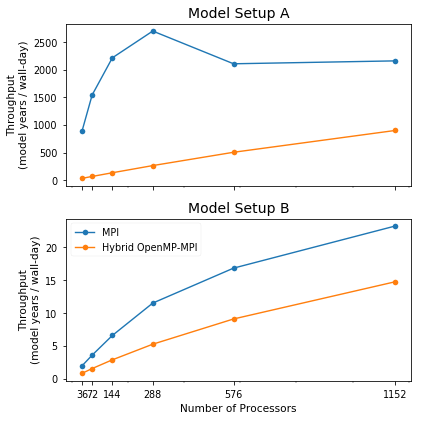

In [188]:
fig, axes = plt.subplots(nrows=2, figsize=(6, 6), sharex=True, sharey=False)

make_subplot(df_wb, axes[0], title='Model Setup A')
make_subplot(df_eb, axes[1], title='Model Setup B')
plt.legend()

plt.tight_layout()

fig.savefig('../figs/VIC_scaling.png', dpi=300)